# WeatherPy
### Analysis
- As noted and expected before the closer the cities are to the equator the warmer the tempeature is.
- There is no strong correlation between latitude and cloudiness
- There is no strong correlation between latitude and wind speed

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat and longs and cities
lat_longs = []
cities = []

# Create a set of random lat and long combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm counts
len(cities)

648

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "f67b80a4c7a4ef22b82ddce0370bcfd5"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to log
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Long": city_long, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If there is an error, skip the city
    except:
        print("City not found. Moving on.")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=chuy
Processing Record 2 of Set 1 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tsihombe
Processing Record 3 of Set 1 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=ostrovnoy
Processing Record 4 of Set 1 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bengkulu
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=mataura
Processing Record 6 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=nikolskoye
Processing Record 7 of Set 1 | i

Processing Record 3 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=khatanga
Processing Record 4 of Set 2 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=nizhneyansk
Processing Record 5 of Set 2 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=ixtapa
Processing Record 6 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tuktoyaktuk
Processing Record 7 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=jamestown
Processing Record 8 of Set 2 | phangnga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=phangnga
Processing Record 9 of Set 2 | northam
http://api.openweathermap.org/data/2.5/

Processing Record 6 of Set 3 | mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=mackay
Processing Record 7 of Set 3 | kautokeino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=kautokeino
Processing Record 8 of Set 3 | makungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=makungu
Processing Record 9 of Set 3 | dinguiraye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=dinguiraye
Processing Record 10 of Set 3 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=cherskiy
Processing Record 11 of Set 3 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=pangnirtung
Processing Record 12 of Set 3 | bima
http://api.openweathermap.org/data/2.5/we

Processing Record 9 of Set 4 | bolshaya vishera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bolshaya%20vishera
City not found. Moving on.
Processing Record 10 of Set 4 | george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=george
Processing Record 11 of Set 4 | bukene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bukene
Processing Record 12 of Set 4 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=hambantota
Processing Record 13 of Set 4 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=mys%20shmidta
Processing Record 14 of Set 4 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=marcona
Processing Record 15 of Set 4 | inni

Processing Record 12 of Set 5 | paragould
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=paragould
Processing Record 13 of Set 5 | bestobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bestobe
Processing Record 14 of Set 5 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=san%20patricio
Processing Record 15 of Set 5 | bujaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bujaru
Processing Record 16 of Set 5 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=omboue
Processing Record 17 of Set 5 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=los%20llanos%20de%20aridane
Processing Record 18 of Set 5 | ust-kut
http://a

Processing Record 15 of Set 6 | rindge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=rindge
Processing Record 16 of Set 6 | ca mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=ca%20mau
Processing Record 17 of Set 6 | awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=awjilah
Processing Record 18 of Set 6 | sulangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=sulangan
Processing Record 19 of Set 6 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bambous%20virieux
Processing Record 20 of Set 6 | wisconsin rapids
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=wisconsin%20rapids
Processing Record 21 of Set 6 | san ignacio
http://api.o

Processing Record 18 of Set 7 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=padang
Processing Record 19 of Set 7 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=la%20asuncion
Processing Record 20 of Set 7 | razdolnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=razdolnoye
Processing Record 21 of Set 7 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=guerrero%20negro
Processing Record 22 of Set 7 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tura
Processing Record 23 of Set 7 | tevriz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tevriz
Processing Record 24 of Set 7 | haines junction
http://api.openweatherma

Processing Record 21 of Set 8 | ndioum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=ndioum
Processing Record 22 of Set 8 | nisko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=nisko
Processing Record 23 of Set 8 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=urumqi
City not found. Moving on.
Processing Record 24 of Set 8 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=touros
Processing Record 25 of Set 8 | kisanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=kisanga
Processing Record 26 of Set 8 | rio branco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=rio%20branco
Processing Record 27 of Set 8 | narsaq
http://api.openweathermap.org/

Processing Record 24 of Set 9 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tabiauea
City not found. Moving on.
Processing Record 25 of Set 9 | bad orb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bad%20orb
Processing Record 26 of Set 9 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=nyurba
Processing Record 27 of Set 9 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=deputatskiy
Processing Record 28 of Set 9 | nueva gorgona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=nueva%20gorgona
Processing Record 29 of Set 9 | el campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=el%20campo
Processing Record 30 of Set 9 | ogulin


Processing Record 26 of Set 10 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=sao%20jose%20da%20coroa%20grande
Processing Record 27 of Set 10 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=ribeira%20grande
Processing Record 28 of Set 10 | bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=bontang
Processing Record 29 of Set 10 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=amahai
Processing Record 30 of Set 10 | tupik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tupik
Processing Record 31 of Set 10 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=cap%20malheureux
Processing Record 32

Processing Record 28 of Set 11 | finschhafen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=finschhafen
Processing Record 29 of Set 11 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=vila%20velha
Processing Record 30 of Set 11 | rizhao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=rizhao
Processing Record 31 of Set 11 | nuevitas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=nuevitas
Processing Record 32 of Set 11 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=leningradskiy
Processing Record 33 of Set 11 | mathathane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=mathathane
Processing Record 34 of Set 11 | ulcinj
http://api.ope

Processing Record 30 of Set 12 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=flin%20flon
Processing Record 31 of Set 12 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=khandyga
Processing Record 32 of Set 12 | sri aman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=sri%20aman
City not found. Moving on.
Processing Record 33 of Set 12 | camara de lobos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=camara%20de%20lobos
Processing Record 34 of Set 12 | santa cruz cabralia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=santa%20cruz%20cabralia
Processing Record 35 of Set 12 | buxar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=buxar
Proce

Processing Record 33 of Set 13 | tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=tabas
Processing Record 34 of Set 13 | mutsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=mutsu
Processing Record 35 of Set 13 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=kutum
Processing Record 36 of Set 13 | gulshat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=gulshat
City not found. Moving on.
Processing Record 37 of Set 13 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=opuwo
Processing Record 38 of Set 13 | le port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67b80a4c7a4ef22b82ddce0370bcfd5&q=le%20port
Processing Record 39 of Set 13 | shakhtinsk
http://api.openweathermap.org/d

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Long          580
Max Temp      580
Wind Speed    580
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,chuy,64,UY,1511027848,80,-33.70,-53.46,61.57,22.84
1,tsihombe,8,MG,1511027857,71,-25.30,45.48,67.10,6.17
2,ostrovnoy,80,RU,1511027960,98,68.05,39.51,21.97,5.17
3,bengkulu,76,ID,1511027813,100,-3.80,102.27,78.62,6.85
4,mataura,0,IN,1511027786,75,27.50,77.68,64.31,7.07


## Latitude vs Temperature Plot

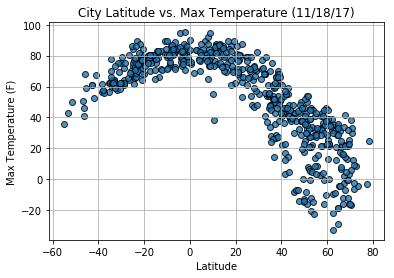

In [8]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

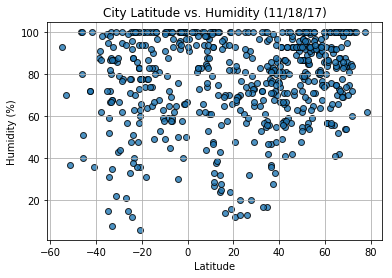

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

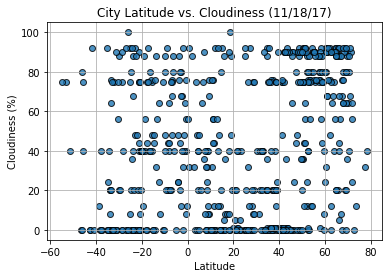

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

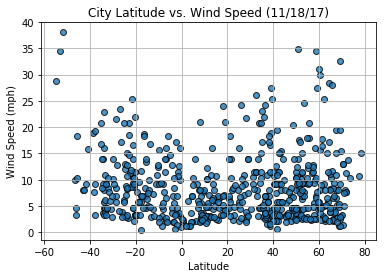

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()